In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RepeatedKFold
from catboost import CatBoostClassifier

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [2]:
df=pd.read_csv('housing cali.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


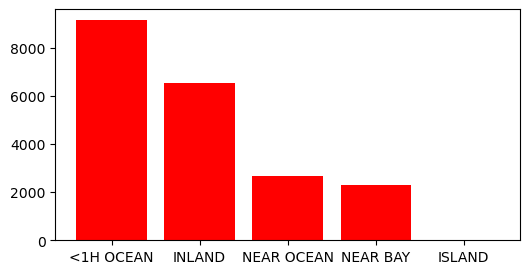

In [5]:
df1=df['ocean_proximity'].value_counts()
plt.figure(figsize=(6,3))
plt.bar(df1.index,df1.values,color='red')
plt.show()

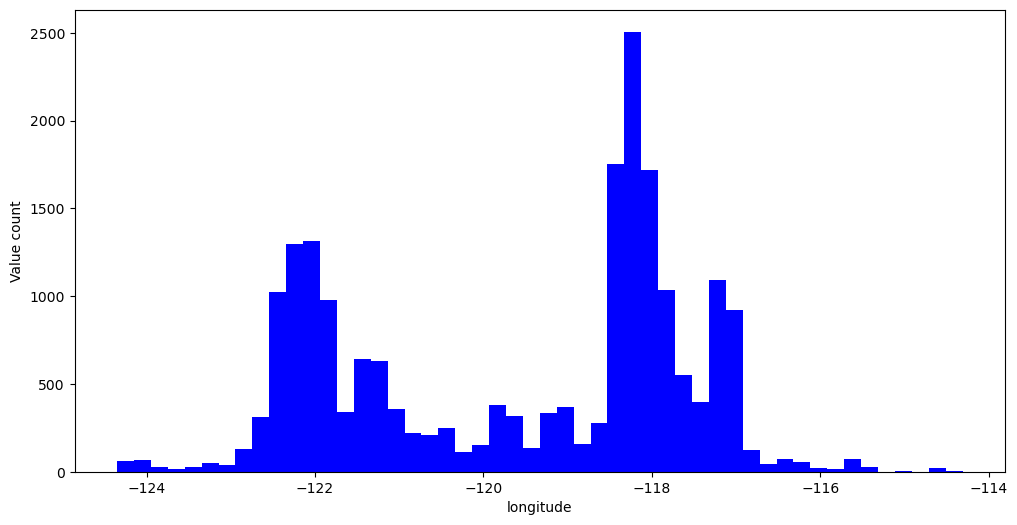

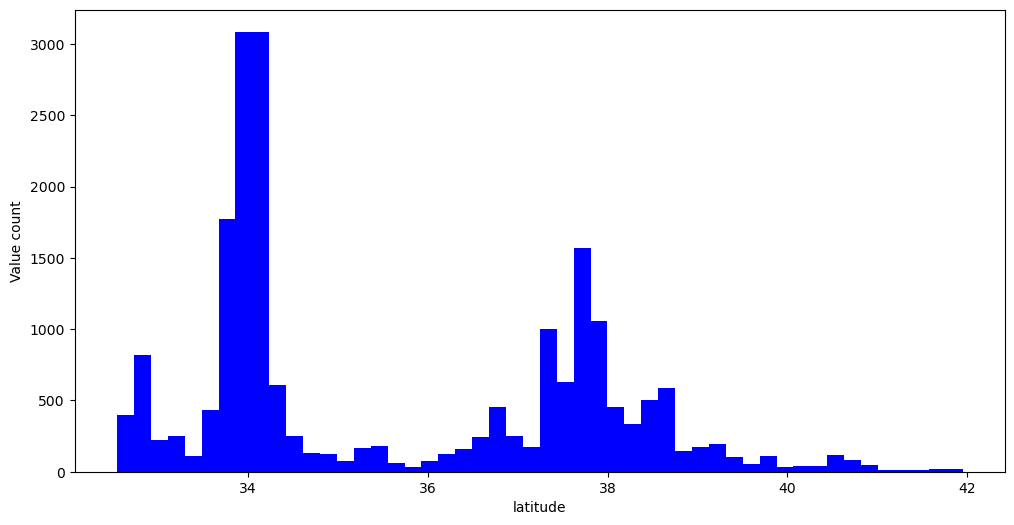

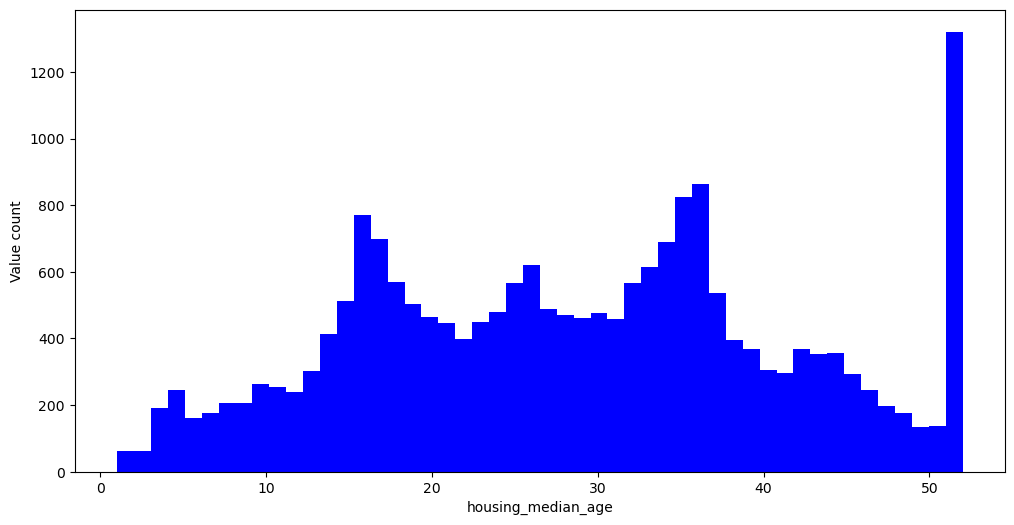

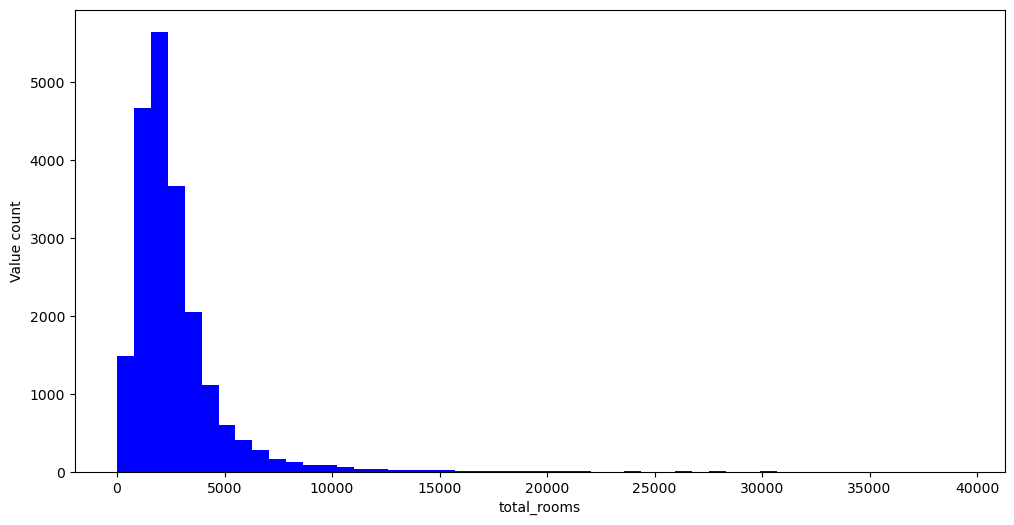

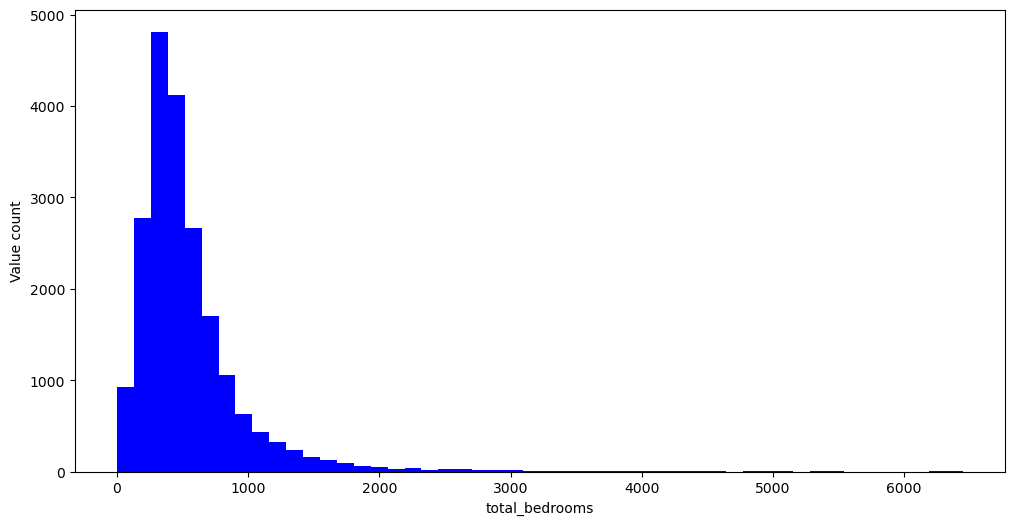

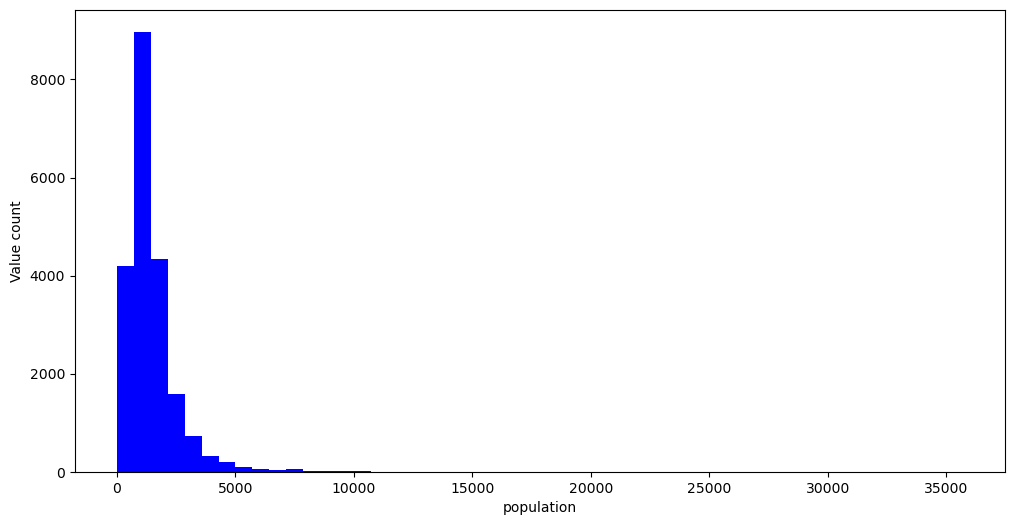

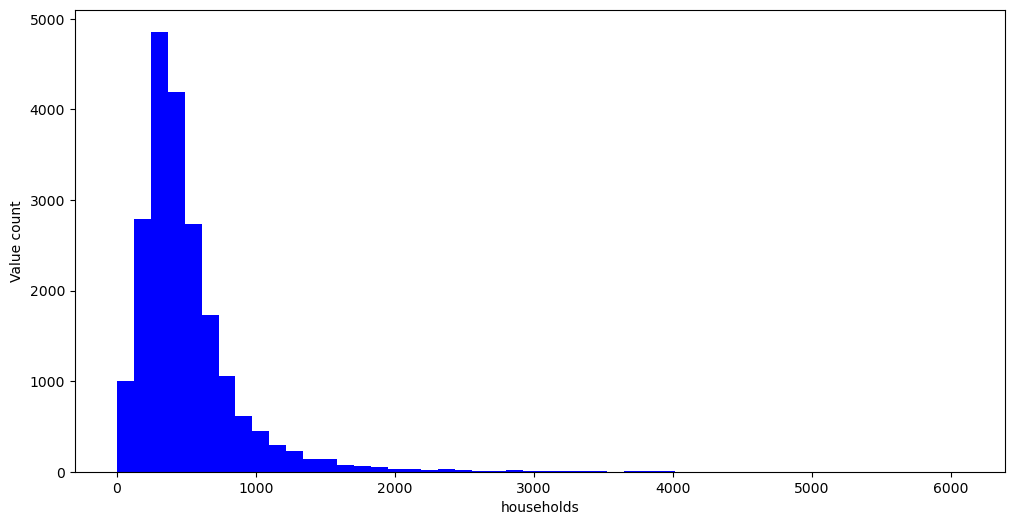

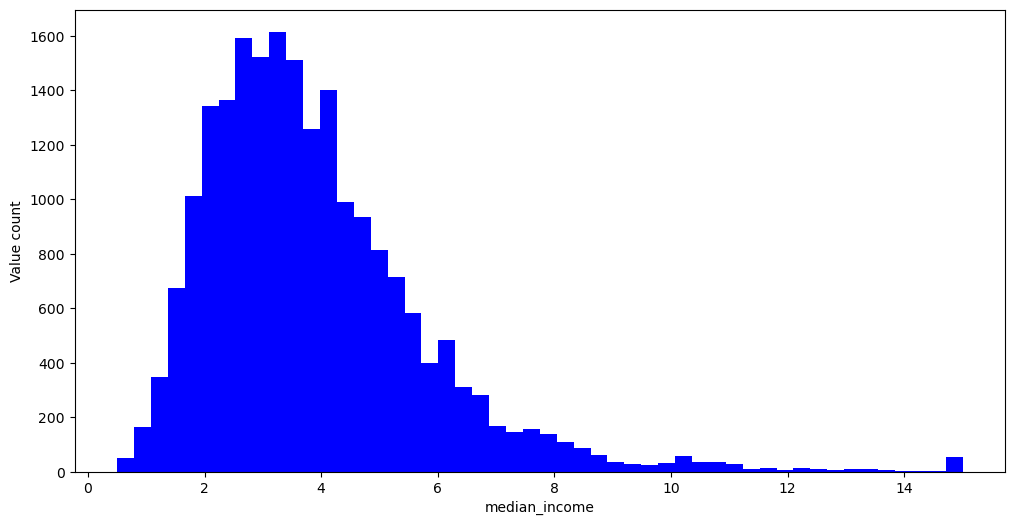

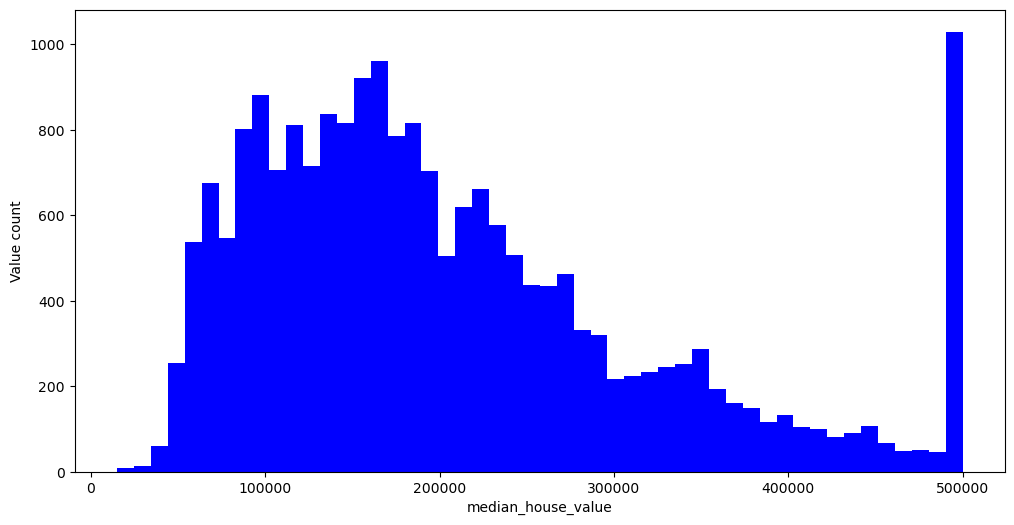

In [6]:
for column in df.columns:
    if df[column].dtype=='float64':
        plt.figure(figsize=(12,6))
        plt.hist(df[column],bins=50,color='blue')
        plt.xlabel(column)
        plt.ylabel('Value count')
        plt.show()
    
    

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

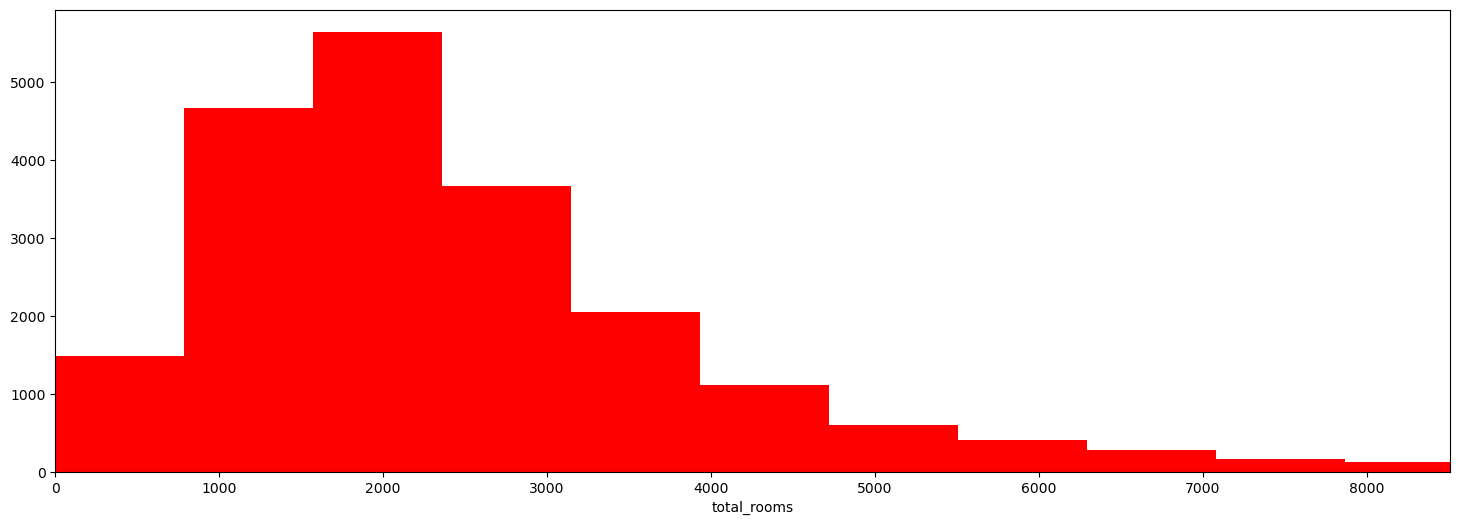

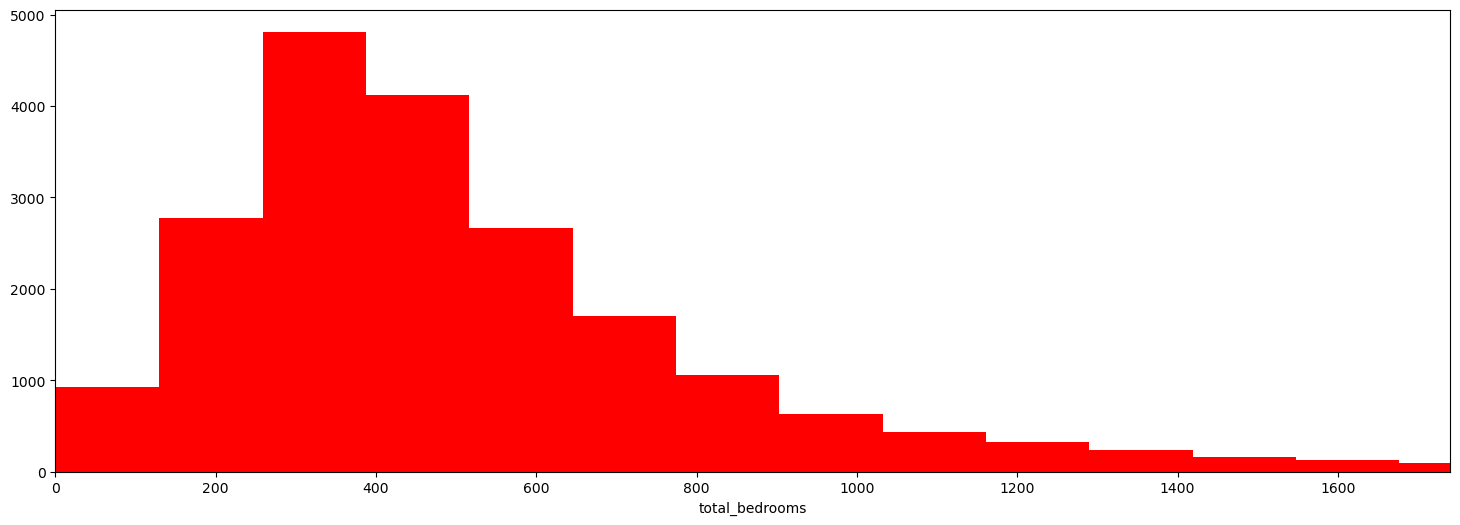

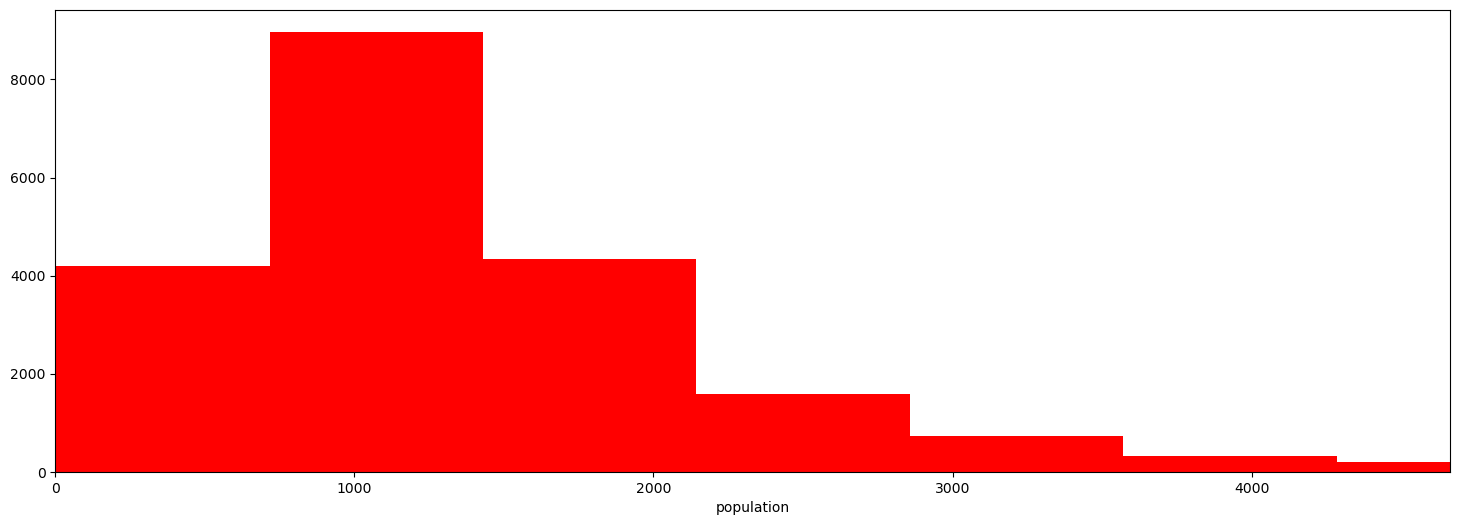

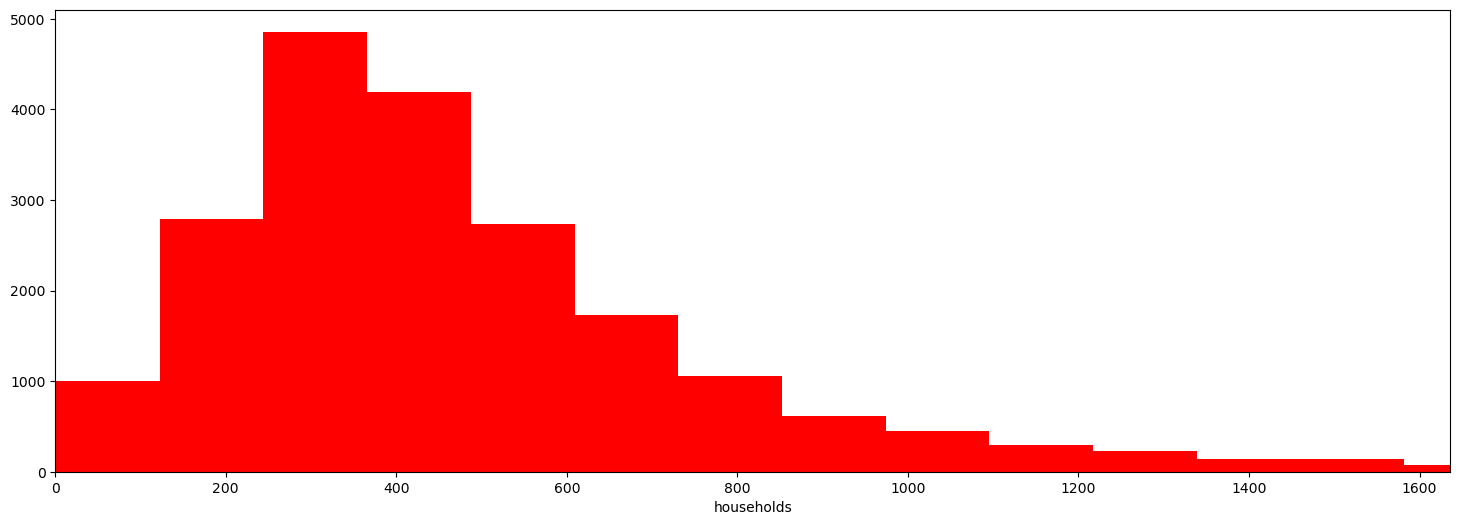

In [8]:
names=['total_rooms','total_bedrooms', 'population', 'households']
df2=df[names]
for column in df2.columns:
    plt.figure(figsize=(18,6))
    plt.hist(df2[column],bins=50,color='red')
    
    plt.xlim(0,4*(df2[column].median()))
    plt.xlabel(column)
    plt.show()

In [9]:
df_d=pd.get_dummies(df['ocean_proximity'])
df=pd.concat([df,df_d],axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


/var/folders/sh/8wmrp9hs5bn4nq4jmq1t_d9r0000gn/T/ipykernel_86737/1506359382.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat=df.corr()


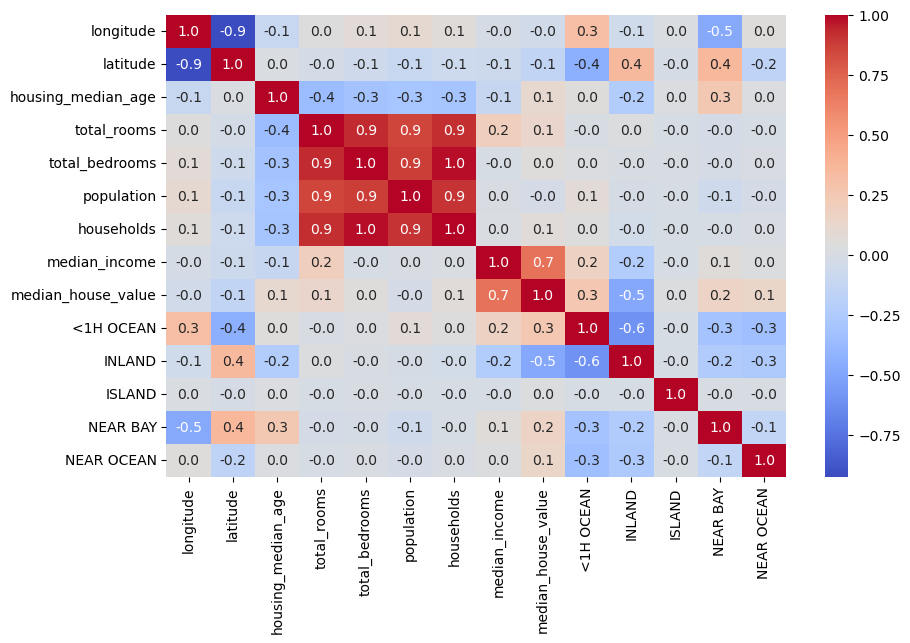

In [10]:
heat=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(heat,cmap='coolwarm',annot=True,fmt="0.1f")
plt.show()

In [11]:
def out_lier(d_f,column,threshold=2.5):
    mn=d_f[column].mean()
    st=d_f[column].std()
    row_number=[]
    for i in range(20640):
        z=(d_f[column].iloc[i]-mn)/st
        if z>=threshold or z<=-threshold:
            row_number.append(i)
    d_f=d_f.drop(row_number) 
    return d_f

In [12]:
for name in names:
    df4=out_lier(df,column=name)
del df4['ocean_proximity']
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20079 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20079 non-null  float64
 1   latitude            20079 non-null  float64
 2   housing_median_age  20079 non-null  float64
 3   total_rooms         20079 non-null  float64
 4   total_bedrooms      19877 non-null  float64
 5   population          20079 non-null  float64
 6   households          20079 non-null  float64
 7   median_income       20079 non-null  float64
 8   median_house_value  20079 non-null  float64
 9   <1H OCEAN           20079 non-null  uint8  
 10  INLAND              20079 non-null  uint8  
 11  ISLAND              20079 non-null  uint8  
 12  NEAR BAY            20079 non-null  uint8  
 13  NEAR OCEAN          20079 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 1.6 MB


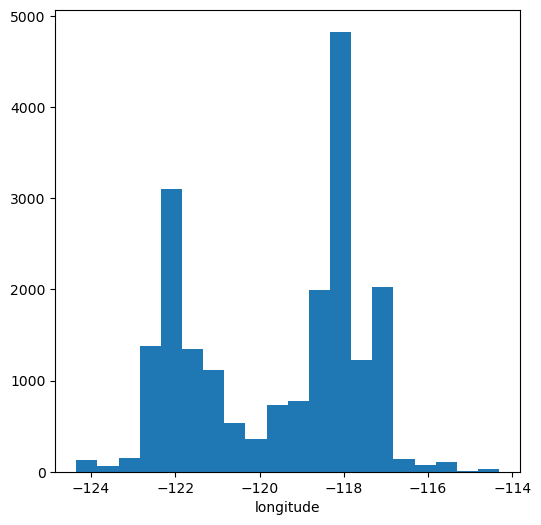

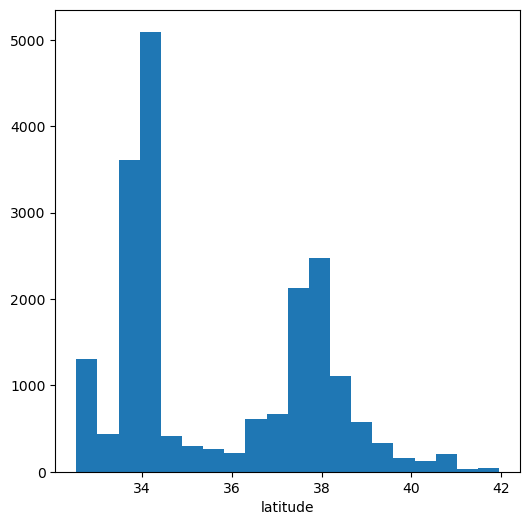

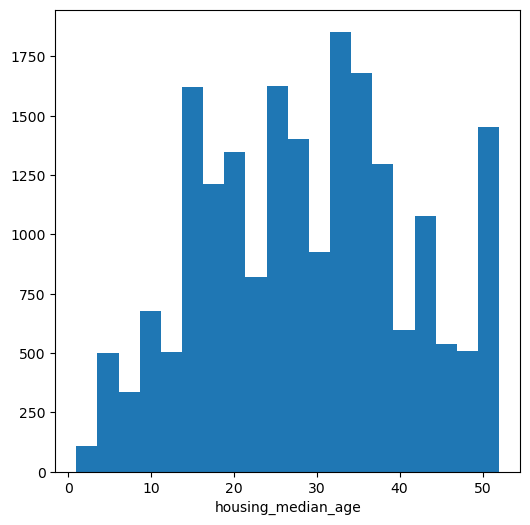

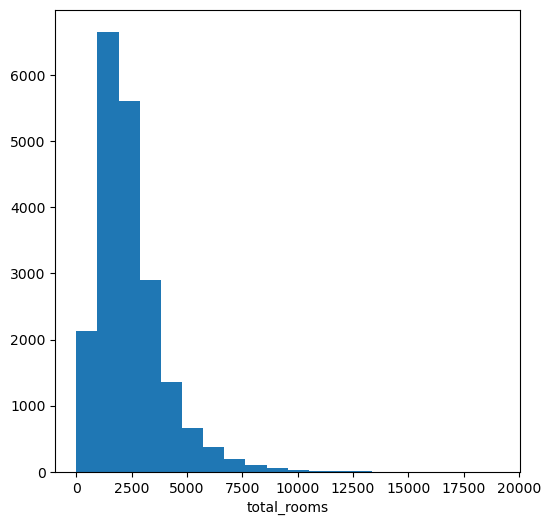

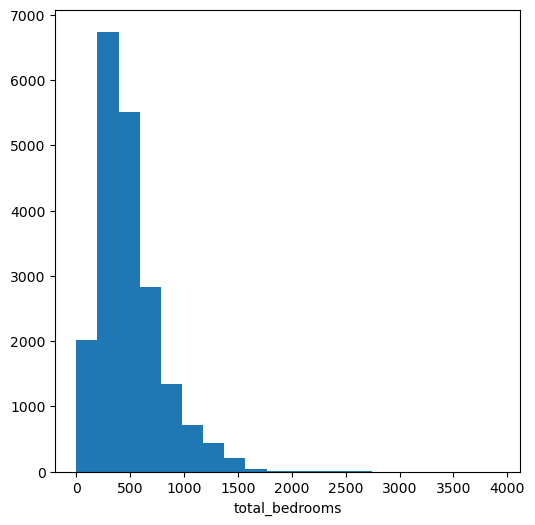

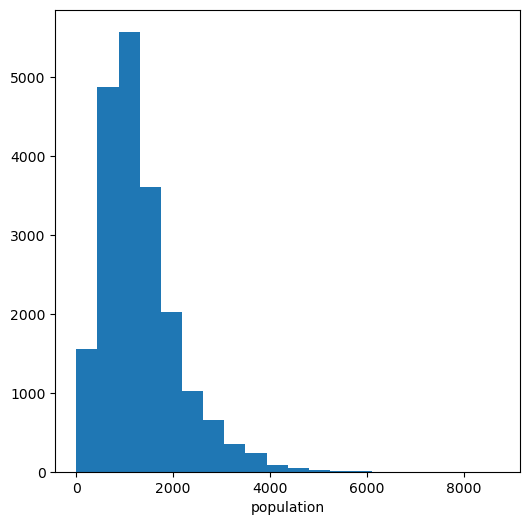

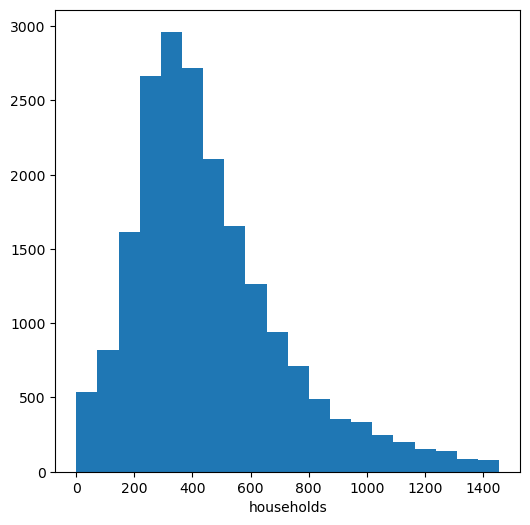

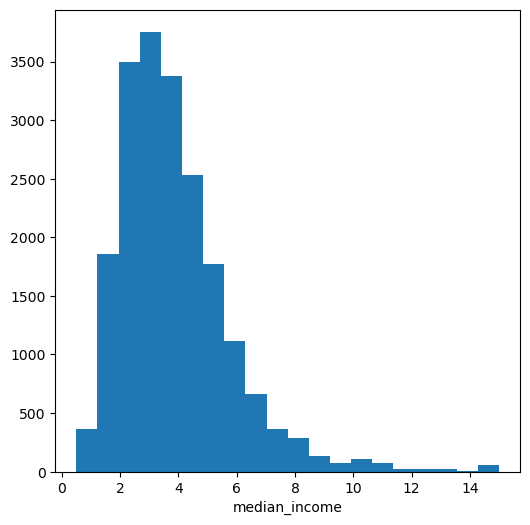

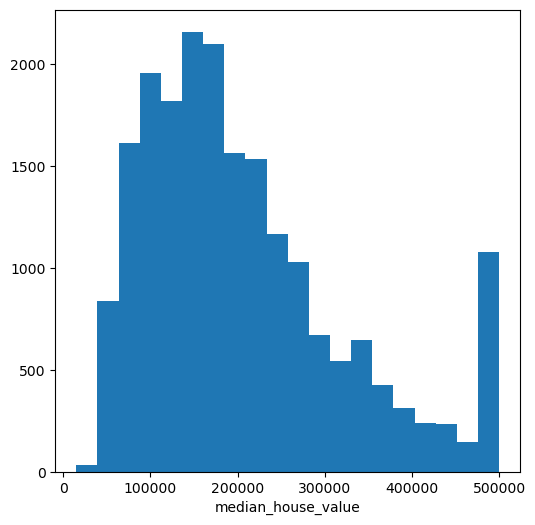

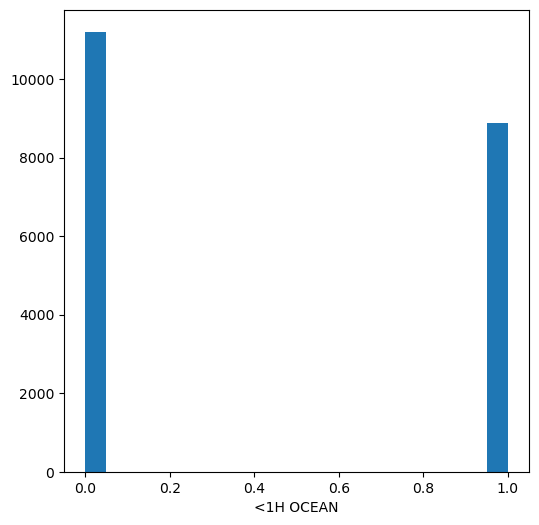

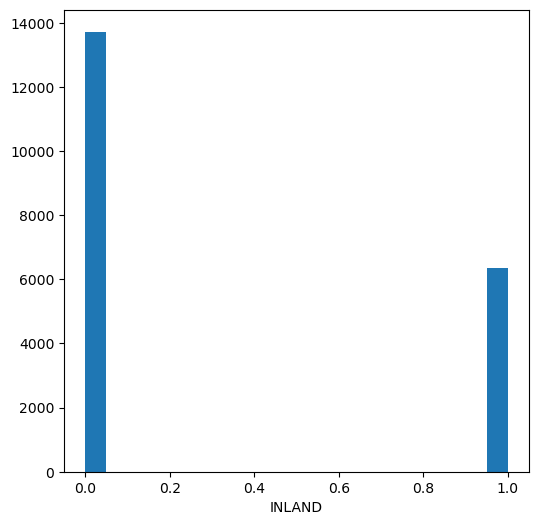

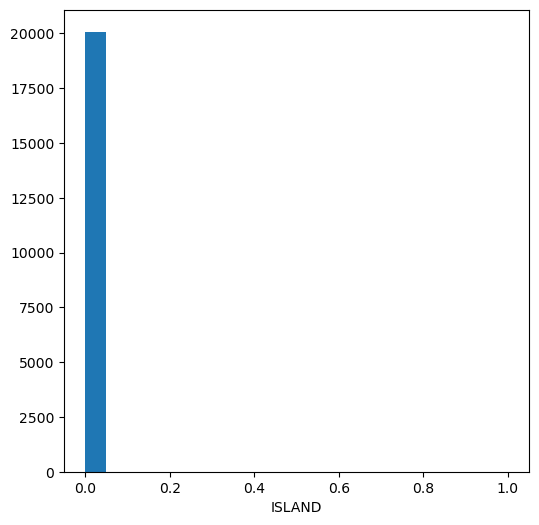

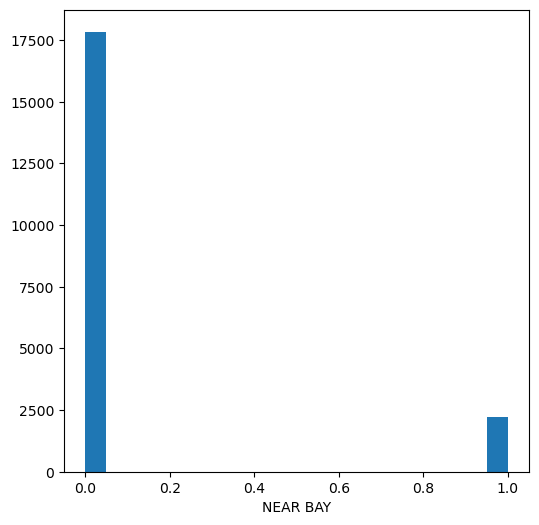

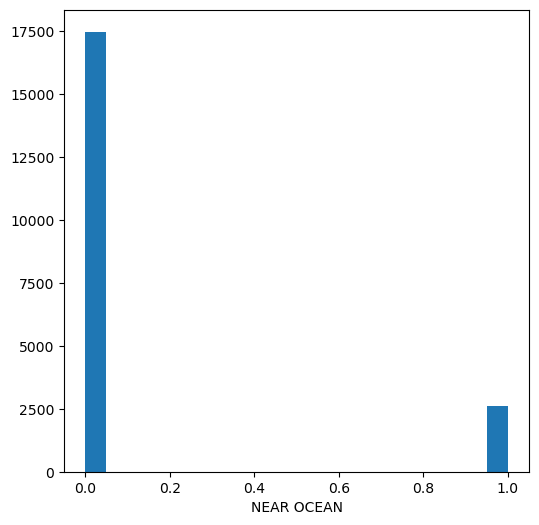

In [13]:
for column in df4.columns:
    plt.figure(figsize=(6,6))
    plt.hist(df4[column],bins=20)
    plt.xlabel(column)
    plt.show()

    


In [14]:
df4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


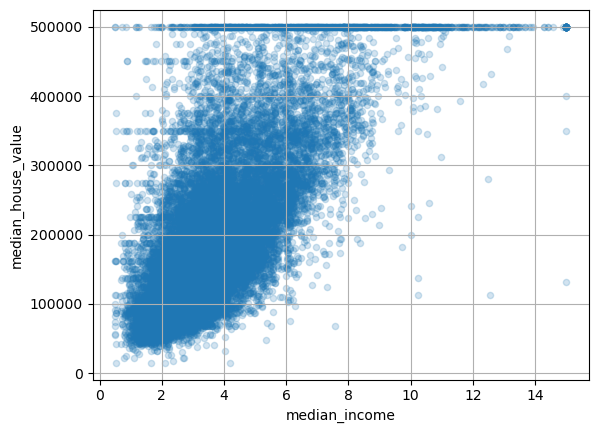

In [15]:
df4.plot(kind='scatter',x='median_income',y='median_house_value',grid=True,alpha=0.2)
plt.show()

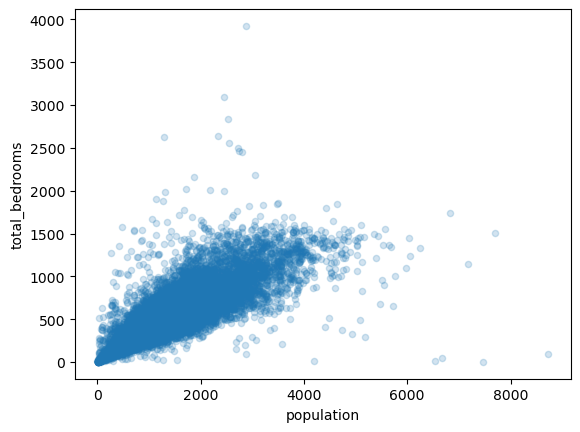

In [16]:
df4.plot(kind='scatter',x='population',y='total_bedrooms',alpha=0.2)
plt.show()

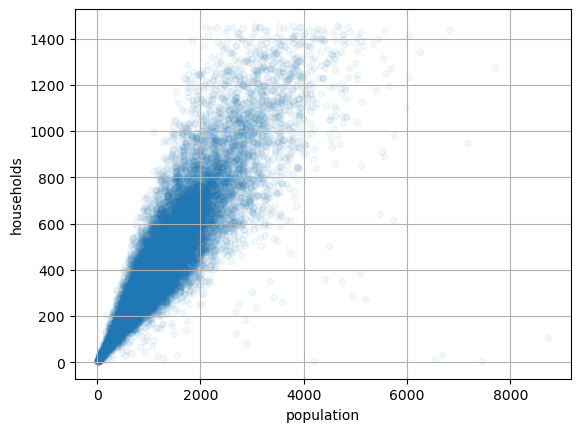

In [17]:
df4.plot(kind='scatter',y='households',x='population',grid=True,alpha=0.05)
plt.show()

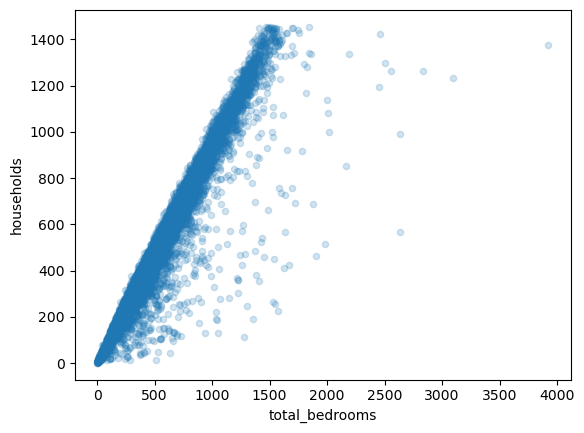

In [18]:
df4.plot(kind='scatter',x='total_bedrooms',y='households',alpha=0.2)
plt.show()

In [19]:
df4.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [20]:
only_t=['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']
df5=(df4[only_t]-df4[only_t].mean())/df4[only_t].std()
df5=pd.concat([df5,df_d],axis=1)
df5=df5.dropna()
df5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.321491,1.045562,0.961857,-1.025788,-1.243124,-1.250785,-1.262323,2.337141,2.125945,0,0,0,1,0
1,-1.316502,1.036212,-0.641904,3.157368,2.112972,1.381327,2.603667,2.324670,1.313198,0,0,0,1,0
2,-1.326481,1.031538,1.843926,-0.630948,-1.033582,-1.030492,-1.067495,1.777643,1.257921,0,0,0,1,0
3,-1.331471,1.031538,1.843926,-0.760767,-0.879003,-0.951997,-0.907049,0.931794,1.164640,0,0,0,1,0
4,-1.331471,1.031538,1.843926,-0.523325,-0.724423,-0.943135,-0.754243,-0.009733,1.172414,0,0,0,1,0


In [21]:
X,Y=df5[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN']],df5[['median_income']]
Y.head()

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
print(x_train.shape,y_train.shape)
X.info()

(13913, 14) (13913, 1)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19877 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19877 non-null  float64
 1   latitude            19877 non-null  float64
 2   housing_median_age  19877 non-null  float64
 3   total_rooms         19877 non-null  float64
 4   total_bedrooms      19877 non-null  float64
 5   population          19877 non-null  float64
 6   households          19877 non-null  float64
 7   median_income       19877 non-null  float64
 8   median_house_value  19877 non-null  float64
 9   <1H OCEAN           19877 non-null  uint8  
 10  INLAND              19877 non-null  uint8  
 11  ISLAND              19877 non-null  uint8  
 12  NEAR BAY            19877 non-null  uint8  
 13  NEAR OCEAN          19877 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 1.6 MB


In [23]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [25]:
err=mean_squared_error(y_test,y_pred)
err

5.984388707324634e-29